# RNN

## RNNとは
　RNN は主に時系列データを扱うためのDNNです。Recurrent Neural Networkの略です。

　ここでいう時系列データとは、ある時点の事象がそれ以降の事象になんらかの因果関係を持つと考えられるデータのことを指します。例えばある商品の月ごとの売上、企業の株価変動、特定の地点で発生した地震の大きさの推移、あるいは音声、文章のような言語的な流れなどが、時系列データと見ることができます。

　RNNの改良版としてLSTMやGRUというモデルもあります。

## RNNの仕組み

　RNNでは、DNN の隠れ層の出力を入力としてフィードバックさせるループをネットワーク上に作ります。このモデルに時系列でデータを入力すると、古いデータが新しいデータに影響を与えるような学習が期待できます。
 
![rnn](fig/rnn.png)


### KerasによるRNNの実装

　RNNおよびLSTMで sin波の予測をしてみます。

　以下の方針で進めます。
- １続きの25個のデータから26個目を予測するようなモデルを作る。
- できあがったモデルを使って1〜25番目のデータで26番目を予測、2〜26番目のデータで27番目を予測、..を繰り返し、グラフ全体を作る。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

### データ準備

きれいな sin 波のデータにノイズをのせて入力データとします。

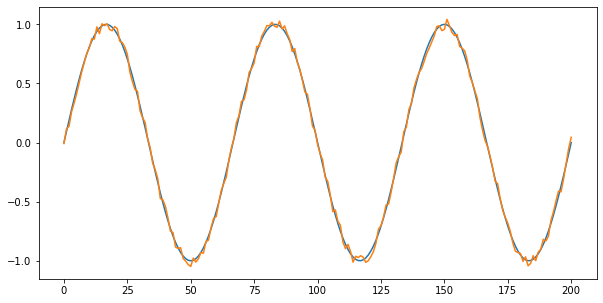

In [2]:
np.random.seed(1)

def make_sin_curve_with_noise(T, ampl):
    period = 3    # 周期
    x = np.arange(0, T + 1)
    noise = ampl * (np.random.rand(len(x)) * 2 - 1)  # (-ampl 〜 ample) の乱数
    return np.sin(2.0 * np.pi * x / T * period) + noise   # 2周期分

T = 200      # 全時系列の長さ
# noise_ratio = 0.2   # ノイズの大きさ
noise_ratio = 0.05   # ノイズの大きさ
sin_with_noise = make_sin_curve_with_noise(T, noise_ratio)
sin = make_sin_curve_with_noise(T, 0)

plt.figure(figsize=(10,5))
plt.plot(sin)
plt.plot(sin_with_noise)

In [3]:
# 入力：全部の時系列データを25個ずつに分割したもの
# 正解：次(26個目)のデータ

maxlen = 25  # ひとつの時系列データの長さ

data = []    # 入力
target = []  # 正解

for i in range(0, T - maxlen + 1):
    data.append(sin_with_noise[i: i + maxlen])
    target.append(sin_with_noise[i + maxlen])

# RNN の入出力に合わせて reshape
X = np.array(data).reshape(-1, maxlen, 1)
Y = np.array(target).reshape(-1, 1)


### モデル作成

In [4]:
units = 30

model = Sequential()
# model.add(LSTM(
model.add(SimpleRNN(
                    units=units,
                    input_shape=(maxlen, 1)))
model.add(Dense(units=1,activation='linear'))

model.compile(loss='mse',   # Mean-Square-Error
              optimizer='adam')


### 学習

In [ ]:
epochs = 50
batch_size = 10

history = model.fit(X, Y,
          batch_size=batch_size,
          verbose=1,
          epochs=epochs)

### 結果確認

In [6]:
# 新たに sin データを作成
test_data = make_sin_curve_with_noise(T, noise_ratio)
# 最初のmaxlen個を初期データとする
initial = np.array(test_data[:maxlen])

# 予測結果を入れるリスト
predicted = np.zeros(T + 1)
# 初期データを先頭にコピー
for i in range(maxlen):
    predicted[i] = initial[i]

# 予測値を計算してリストに追加
for i in range(T - maxlen + 1):
    x_ = predicted[i:i+maxlen].reshape(1, maxlen, 1)
    y_ = model.predict(x_)
    predicted[i + maxlen] = y_[0,0]


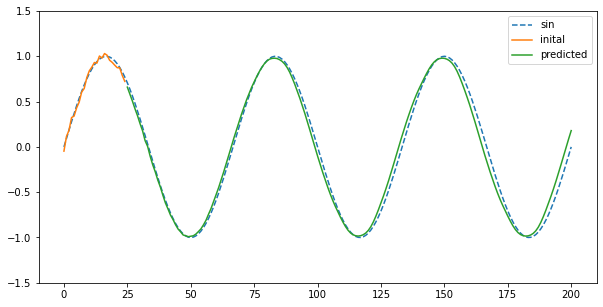

In [7]:
# 図示
plt.figure(figsize=(10,5))
plt.ylim([-1.5, 1.5])
plt.plot(sin, label='sin', linestyle='--')
plt.plot(test_data[:maxlen], label='inital')
plt.plot(range(maxlen, T + 1 ), predicted[maxlen:], label='predicted')
plt.legend()
plt.show()
